In [2]:
import time
from utils.parameters import *
from utils.graph import load_graph, find_optimal
from utils.utils import *
from utils.model import create_model
from qiskit_key import get_key
from db import Database
from qiskit_ibm_runtime.fake_provider import FakeOsaka
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import SamplerV1 as Sampler
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_algorithms import SamplingVQE

SERVICE_KEY = get_key()

# Create dicts for data
ANSATZ = Ansatz()

graphs = []

print("Loading graphs...")
for i in range(10):
    g = load_graph(f"graphs/graph_5_{i}")
    model = create_model(g)
    graphs.append((g, model))

print("Creating backend...")
# Ignore the warning message since we need to use the deprecated sampler
aer_sim = AerSimulator().from_backend(FakeOsaka())
noisy_sampler = Sampler(backend=aer_sim)

finished = None
with Database() as db:
    finished = db.get_finished_vqe()

def qp_to_qubo(qp):
    qp2qubo = QuadraticProgramToQubo()
    qubo = qp2qubo.convert(qp)
    qubitOp, offset = qubo.to_ising()
    return qubo, qubitOp.num_qubits


def run_vqe(qubo, optimizer, ansatz):
    print("Running VQE...")
    vqe = SamplingVQE(sampler=noisy_sampler, ansatz=ansatz, optimizer=optimizer)
    optimizer = MinimumEigenOptimizer(vqe)
    vqe_result = optimizer.solve(qubo)

    return vqe_result.samples


ModuleNotFoundError: No module named 'symengine.lib.symengine_wrapper'

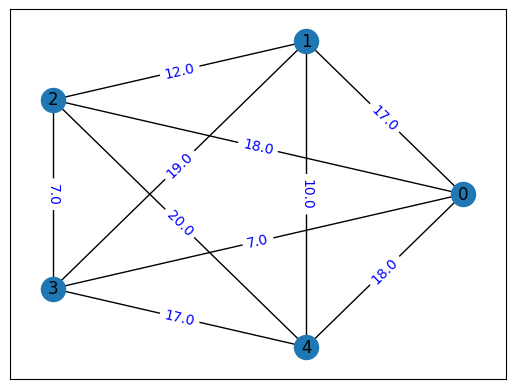

In [2]:
graph = graphs[0]

graph[0].plot_graph()

In [3]:
from utils.graph import find_optimal
find_optimal(graph[0].graph)

54.0

In [4]:
qubo, num_qubits = qp_to_qubo(graph[1])

ansatz = ANSATZ.get_ansatz(num_qubits, "two_local", 1)
optimizer = optimizers.get("spsa")

raw_samples = run_vqe(qubo, optimizer, ansatz)
samples = process_samples(raw_samples, graph[1])

Running VQE...


In [5]:
raw_samples

[SolutionSample(x=array([0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.]), fval=64.0, probability=0.0055, status=<OptimizationResultStatus.SUCCESS: 0>),
 SolutionSample(x=array([0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.]), fval=74.0, probability=0.00025, status=<OptimizationResultStatus.SUCCESS: 0>),
 SolutionSample(x=array([0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.]), fval=76.0, probability=0.00025, status=<OptimizationResultStatus.SUCCESS: 0>),
 SolutionSample(x=array([0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.]), fval=84.0, probability=0.002, status=<OptimizationResultStatus.SUCCESS: 0>),
 SolutionSample(x=array([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), fval=1288.0, probability=0.002, status=<OptimizationResultStatus.SUCCESS: 0>),
 SolutionSample(x=array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.]), fval=1297.0, probability=0.0005, status=<OptimizationResultSta

In [6]:
samples

[{'feasible': True, 'cost': 64.0, 'probability': 0.0055},
 {'feasible': True, 'cost': 74.0, 'probability': 0.00025},
 {'feasible': True, 'cost': 76.0, 'probability': 0.00025},
 {'feasible': True, 'cost': 84.0, 'probability': 0.002},
 {'feasible': False, 'cost': 1288.0, 'probability': 0.002},
 {'feasible': False, 'cost': 1297.0, 'probability': 0.0005},
 {'feasible': False, 'cost': 1299.0, 'probability': 0.02975},
 {'feasible': False, 'cost': 1300.0, 'probability': 0.00025},
 {'feasible': False, 'cost': 1304.0, 'probability': 0.0005},
 {'feasible': False, 'cost': 1305.0, 'probability': 0.0005},
 {'feasible': False, 'cost': 1306.0, 'probability': 0.00025},
 {'feasible': False, 'cost': 1307.0, 'probability': 0.00025},
 {'feasible': False, 'cost': 1307.0, 'probability': 0.00025},
 {'feasible': False, 'cost': 1308.0, 'probability': 0.00025},
 {'feasible': False, 'cost': 1308.0, 'probability': 0.0015},
 {'feasible': False, 'cost': 1310.0, 'probability': 0.05525},
 {'feasible': False, 'cost': 

In [8]:
get_cost_ratio(samples, graph[0].optimal)

0.7248322147651006

In [1]:

from db import Database
with Database() as db:
    finished = db.get_finished_qaoa()
    print(len(finished))

80
